In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('pre-owned cars.csv')

In [5]:
data.head(10)

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL
5,Honda,WR-V 1.2L I-VTEC VX MT,Manual,2021.0,01-10-2021,Petrol,1199.0,44787.0,1st owner,796000,15561.0,True,No,UP32,2021 Honda WR-V 1.2L I-VTEC VX MT
6,Tata,PUNCH CREATIVE 1.2 RTN DUAL TONE,Manual,2022.0,01-11-2022,Petrol,1199.0,450.0,1st owner,813000,15475.0,True,Yes,DL3C,2022 Tata PUNCH CREATIVE 1.2 RTN DUAL TONE
7,Tata,NEXON XMA DIESEL,Automatic,2020.0,01-02-2021,Diesel,NaN,59866.0,1st owner,728000,14228.0,True,No,DL5C,2020 Tata NEXON XMA DIESEL
8,Mahindra,XUV700 AX 7 LUXURY D AWD AT 7 STR,Automatic,2022.0,01-04-2022,Diesel,2184.0,62567.0,1st owner,2322000,44197.0,True,No,DL10,2022 Mahindra XUV700 AX 7 LUXURY D AWD AT 7 STR
9,Ford,Ecosport TITANIUM + 1.5L PETROL AT,Automatic,2019.0,01-07-2019,Petrol,1497.0,58503.0,1st owner,766000,14977.0,True,No,DL10,2019 Ford Ecosport TITANIUM + 1.5L PETROL AT


# Preliminary Analysis

Registration number is not necessary for a dashboard. Registration year, spare_key, title are also not important. We need to convert year, engine_capacity, kms_driven, overall_cost to integer instead of float. Handle missing data. Sort cars by company names.

Lets start by checking the shape, descirption, info, data types and missing values in each columns.

In [6]:
data.shape #this shows we have 15 columns and 2805 rows of data (1 row is for headers). This is good for a dashboard.

(2806, 15)

In [7]:
data.describe()

,make_year,engine_capacity(CC),km_driven,price,overall_cost
count,2805.000000,2688.000000,2805.000000,2.806000e+03,2805.000000
mean,2018.181105,1259.027530,49215.477362,1.342522e+06,13495.022816
std,2.945293,254.504798,26626.932696,3.554669e+07,6040.809220
min,2010.000000,624.000000,450.000000,1.630000e+05,4039.000000
25%,2016.000000,1194.000000,28540.000000,4.350000e+05,9267.000000
50%,2018.000000,1197.000000,45695.000000,5.940000e+05,12145.000000
75%,2021.000000,1462.000000,68182.000000,8.140000e+05,15760.000000
max,2024.000000,2694.000000,143991.000000,1.883558e+09,47338.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                2805 non-null   object 
 1   model                2805 non-null   object 
 2   transmission         2805 non-null   object 
 3   make_year            2805 non-null   float64
 4   reg_year             720 non-null    object 
 5   fuel_type            2805 non-null   object 
 6   engine_capacity(CC)  2688 non-null   float64
 7   km_driven            2805 non-null   float64
 8   ownership            2805 non-null   object 
 9   price                2806 non-null   int64  
 10  overall_cost         2805 non-null   float64
 11  has_insurance        2805 non-null   object 
 12  spare_key            2805 non-null   object 
 13  reg_number           2805 non-null   object 
 14  title                2805 non-null   object 
dtypes: float64(4), int64(1), object(10)
me

Now we can see reg_year is available for only 1/4th of the entries, hence better to drop this column. And we have 4 columns that are float that need to be converted to int.

In [9]:
data.isnull().sum()

,0
brand,1
model,1
transmission,1
make_year,1
reg_year,2086
fuel_type,1
engine_capacity(CC),118
km_driven,1
ownership,1
price,0


Engine capacity has a few null values, now we can either drop them or manipulate them. Engine capacity is an important aspect when looking at cost of used cars. So I will impute this by taking mean.

In [10]:
data.fillna({'engine_capacity(CC)': data['engine_capacity(CC)'].mean()}, inplace=True)

In [11]:
data.isnull().sum()

,0
brand,1
model,1
transmission,1
make_year,1
reg_year,2086
fuel_type,1
engine_capacity(CC),0
km_driven,1
ownership,1
price,0


Dropped the unwanted columns.

In [12]:
data.drop(['reg_number', 'title', 'spare_key', 'reg_year'], axis=1, inplace=True)

In [13]:
data.isnull().sum()

,0
brand,1
model,1
transmission,1
make_year,1
fuel_type,1
engine_capacity(CC),0
km_driven,1
ownership,1
price,0
overall_cost,1


Now we drop the values from the othet columns as they are just 1 in each, so it doesnt affect our dataset in anyway.

In [14]:
data.dropna(subset=['brand', 'model', 'transmission', 'make_year', 'fuel_type', 'km_driven', 'ownership', 'overall_cost', 'has_insurance'], inplace=True)

In [15]:
data.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True


Now we convert the data types of the columns to integers.

In [16]:
data['make_year'] = data['make_year'].astype(int)
data['km_driven'] = data['km_driven'].astype(int)
data['overall_cost'] = data['overall_cost'].astype(int)
data['engine_capacity(CC)'] = data['engine_capacity(CC)'].astype(int)

In [17]:
data.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020,Diesel,2184,11003,1st owner,1231000,23431,True
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018,Petrol,1591,66936,1st owner,786000,15359,True
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022,Diesel,1956,27990,1st owner,1489000,28349,True
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023,Petrol,1498,5061,1st owner,1227000,23355,True
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021,Diesel,1498,23480,1st owner,887000,16883,True


In [18]:
data = data.sort_values(by=['brand'], ascending=True)
data.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance
1787,Datsun,Redi Go T (O),Manual,2017,Petrol,799,47610,1st owner,239000,4682,True
630,Datsun,Redi Go A,Manual,2018,Petrol,799,45255,1st owner,225000,4404,True
2114,Datsun,Redi Go S 1.0 AMT,Automatic,2019,Petrol,999,49836,1st owner,319000,6234,True
617,Datsun,Redi Go T(O) 1.0,Manual,2020,Petrol,999,39841,1st owner,342000,6695,True
1976,Datsun,Redi Go T(O),Manual,2020,Petrol,799,42479,1st owner,389000,7614,True


Resetting the indexes

In [19]:
data.head(100)

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance
1787,Datsun,Redi Go T (O),Manual,2017,Petrol,799,47610,1st owner,239000,4682,True
630,Datsun,Redi Go A,Manual,2018,Petrol,799,45255,1st owner,225000,4404,True
2114,Datsun,Redi Go S 1.0 AMT,Automatic,2019,Petrol,999,49836,1st owner,319000,6234,True
617,Datsun,Redi Go T(O) 1.0,Manual,2020,Petrol,999,39841,1st owner,342000,6695,True
1976,Datsun,Redi Go T(O),Manual,2020,Petrol,799,42479,1st owner,389000,7614,True
...,...,...,...,...,...,...,...,...,...,...,...
1475,Ford,Ecosport AMBIENTE 1.5L DIESEL,Manual,2013,Diesel,1498,72053,1st owner,409000,13585,True
1804,Ford,FREESTYLE TREND 1.2 PETROL,Manual,2018,Petrol,1194,60679,1st owner,553000,10812,True
24,Ford,FREESTYLE TITANIUM PLUS 1.2 PETROL,Manual,2018,Petrol,1194,66584,1st owner,495000,9675,True
1803,Honda,Brio S MT,Manual,2016,Petrol,1198,55189,2nd owner,400000,7821,True


As a matter of fact even the overall cost column makes no sense. If price column is the asking price then I can only assume the overall_price column is for repairs (I am not sure of it, hence I drop it or rename it to repair_cost). Yeah let's do that actually, rename it to repair_cost. It would be an interesting parameter to have.

In [20]:
data.rename(columns={'overall_cost': 'repair_price'}, inplace=True)
data.head()

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,repair_price,has_insurance
1787,Datsun,Redi Go T (O),Manual,2017,Petrol,799,47610,1st owner,239000,4682,True
630,Datsun,Redi Go A,Manual,2018,Petrol,799,45255,1st owner,225000,4404,True
2114,Datsun,Redi Go S 1.0 AMT,Automatic,2019,Petrol,999,49836,1st owner,319000,6234,True
617,Datsun,Redi Go T(O) 1.0,Manual,2020,Petrol,999,39841,1st owner,342000,6695,True
1976,Datsun,Redi Go T(O),Manual,2020,Petrol,799,42479,1st owner,389000,7614,True


We will save this data for using in PowerBI for a basic dashboard.

In [21]:
data.to_csv('modified_car_data.csv', index=False)

Now our data is ready and we can start the actual analysis on this. Build graphs, do correlation analysis, feature engineering etc.

# Feature Engineering

# One Hot Encoding
We need to handle categorical variables first by one hot encoding them.

We do this because there is no order to the columns that have categorical values, hence it creates a binary value if that value exists its true, if not then false.

In [22]:
data = pd.get_dummies(data, columns=['brand', 'model', 'transmission', 'fuel_type'], drop_first=True)

In [23]:
data.head(100)

,make_year,engine_capacity(CC),km_driven,ownership,price,repair_price,has_insurance,brand_Ford,brand_Honda,brand_Hyundai,...,model_i20 Active 1.4 SX,model_i20 MAGNA (O) 1.2,model_i20 MAGNA 1.2,model_i20 SPORTZ (O) 1.2,model_i20 SPORTZ 1.2,model_i20 SPORTZ 1.4 CRDI,transmission_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol
1787,2017,799,47610,1st owner,239000,4682,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
630,2018,799,45255,1st owner,225000,4404,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2114,2019,999,49836,1st owner,319000,6234,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
617,2020,999,39841,1st owner,342000,6695,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1976,2020,799,42479,1st owner,389000,7614,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,2013,1498,72053,1st owner,409000,13585,True,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1804,2018,1194,60679,1st owner,553000,10812,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
24,2018,1194,66584,1st owner,495000,9675,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1803,2016,1198,55189,2nd owner,400000,7821,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [24]:
data.shape

(2805, 842)

# Label Encoding

Now we do label encoding for ownership column. This is because there is a certain order that needs to be followed. 1st owner becomes 0, 2nd owner becomes 1 and so on.

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

le = LabelEncoder()
data['ownership'] = le.fit_transform(data['ownership'])
data.head(100)

,make_year,engine_capacity(CC),km_driven,ownership,price,repair_price,has_insurance,brand_Ford,brand_Honda,brand_Hyundai,...,model_i20 Active 1.4 SX,model_i20 MAGNA (O) 1.2,model_i20 MAGNA 1.2,model_i20 SPORTZ (O) 1.2,model_i20 SPORTZ 1.2,model_i20 SPORTZ 1.4 CRDI,transmission_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol
1787,2017,799,47610,0,239000,4682,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
630,2018,799,45255,0,225000,4404,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2114,2019,999,49836,0,319000,6234,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
617,2020,999,39841,0,342000,6695,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1976,2020,799,42479,0,389000,7614,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,2013,1498,72053,0,409000,13585,True,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1804,2018,1194,60679,0,553000,10812,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
24,2018,1194,66584,0,495000,9675,True,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1803,2016,1198,55189,1,400000,7821,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True


In [26]:
for column in data.columns:
    print(column)

make_year
engine_capacity(CC)
km_driven
ownership
price
repair_price
has_insurance
brand_Ford
brand_Honda
brand_Hyundai
brand_Jeep
brand_KIA
brand_MG
brand_Mahindra
brand_Maruti
brand_Nissan
brand_Renault
brand_Skoda
brand_Tata
brand_Toyota
brand_Volkswagen
model_A Star VXI
model_ALCAZAR 2.0 SIGNATURE (O) AT 7STR
model_ALTROZ XE PETROL
model_ALTROZ XT PETROL
model_ALTROZ XZ I-TURBO PETROL
model_ALTROZ XZ PETROL
model_ALTROZ XZ PLUS DIESEL
model_ALTROZ XZ PLUS I-TURBO PETROL DARK EDITION
model_ALTROZ XZ PLUS PETROL DARK EDITION
model_ALTROZ XZA
model_ALTROZ XZA PLUS
model_ALTROZ XZA PLUS DARK EDTION
model_AURA S 1.2
model_AURA S 1.2 CNG
model_AURA SX 1.2 (O)
model_AURA SX 1.2 CNG
model_AURA SX PLUS 1.2 AMT
model_AURA SX PLUS 1.2 AMT CRDI
model_AURA SX+ 1.0 TURBO GDI MT
model_Alto 800 LXI
model_Alto 800 LXI CNG O
model_Alto 800 LXI O
model_Alto 800 VXI
model_Alto 800 VXI O
model_Alto K10 LXI
model_Alto K10 VXI
model_Alto K10 VXI (O)
model_Alto K10 VXI (O) AMT
model_Alto K10 VXI AMT
model

It seems that the one hot encoding was not proper. It has missed a lot of columns like cng fule type and automatic transmission!

# Making New Features

(a) Age of the car (from 'make_year')

In [27]:
current_year = 2024
data['car_age'] = current_year - data['make_year']

In [28]:
data.head(100)

,make_year,engine_capacity(CC),km_driven,ownership,price,repair_price,has_insurance,brand_Ford,brand_Honda,brand_Hyundai,...,model_i20 MAGNA (O) 1.2,model_i20 MAGNA 1.2,model_i20 SPORTZ (O) 1.2,model_i20 SPORTZ 1.2,model_i20 SPORTZ 1.4 CRDI,transmission_Manual,fuel_type_Diesel,fuel_type_Electric,fuel_type_Petrol,car_age
1787,2017,799,47610,0,239000,4682,True,False,False,False,...,False,False,False,False,False,True,False,False,True,7
630,2018,799,45255,0,225000,4404,True,False,False,False,...,False,False,False,False,False,True,False,False,True,6
2114,2019,999,49836,0,319000,6234,True,False,False,False,...,False,False,False,False,False,False,False,False,True,5
617,2020,999,39841,0,342000,6695,True,False,False,False,...,False,False,False,False,False,True,False,False,True,4
1976,2020,799,42479,0,389000,7614,True,False,False,False,...,False,False,False,False,False,True,False,False,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,2013,1498,72053,0,409000,13585,True,True,False,False,...,False,False,False,False,False,True,True,False,False,11
1804,2018,1194,60679,0,553000,10812,True,True,False,False,...,False,False,False,False,False,True,False,False,True,6
24,2018,1194,66584,0,495000,9675,True,True,False,False,...,False,False,False,False,False,True,False,False,True,6
1803,2016,1198,55189,1,400000,7821,True,False,True,False,...,False,False,False,False,False,True,False,False,True,8


Correlation Matrix for Selected Columns:
                     engine_capacity(CC)  km_driven     price  repair_price  \
engine_capacity(CC)             1.000000   0.126539  0.577070      0.609099   
km_driven                       0.126539   1.000000 -0.293768     -0.225087   
price                           0.577070  -0.293768  1.000000      0.966033   
repair_price                    0.609099  -0.225087  0.966033      1.000000   
ownership                       0.033185   0.185361 -0.157037     -0.134497   
car_age                        -0.040744   0.557251 -0.598748     -0.473183   
has_insurance                        NaN        NaN       NaN           NaN   
transmission_Manual            -0.106349   0.118027 -0.293966     -0.261462   
fuel_type_Diesel                0.452718   0.190863  0.278792      0.338780   
fuel_type_Electric             -0.000004  -0.015282  0.058490      0.056570   
fuel_type_Petrol               -0.336340  -0.197364 -0.197187     -0.260692   

          

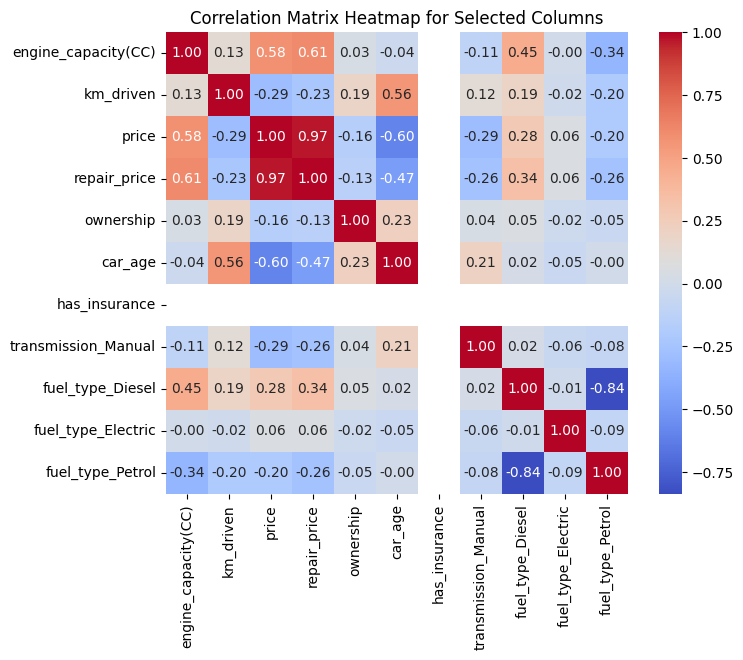


Correlation with Price:
price                  1.000000
repair_price           0.966033
engine_capacity(CC)    0.577070
fuel_type_Diesel       0.278792
fuel_type_Electric     0.058490
ownership             -0.157037
fuel_type_Petrol      -0.197187
km_driven             -0.293768
transmission_Manual   -0.293966
car_age               -0.598748
has_insurance               NaN
Name: price, dtype: float64


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



selected_columns = ['engine_capacity(CC)', 'km_driven', 'price', 'repair_price', 'ownership', 'car_age', 'has_insurance', 'transmission_Manual', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol']
data_subset = data[selected_columns]


correlation_matrix = data_subset.corr()


print("Correlation Matrix for Selected Columns:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap for Selected Columns')
plt.show()

price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("\nCorrelation with Price:")
print(price_correlation)

According to the correlation analysis, more the repair_price, more is the asking price, but thats not true. It should have a negative correlation.

This means that something is skewing the dataset. Hence we need to check for the data distribution and do outlier handling.

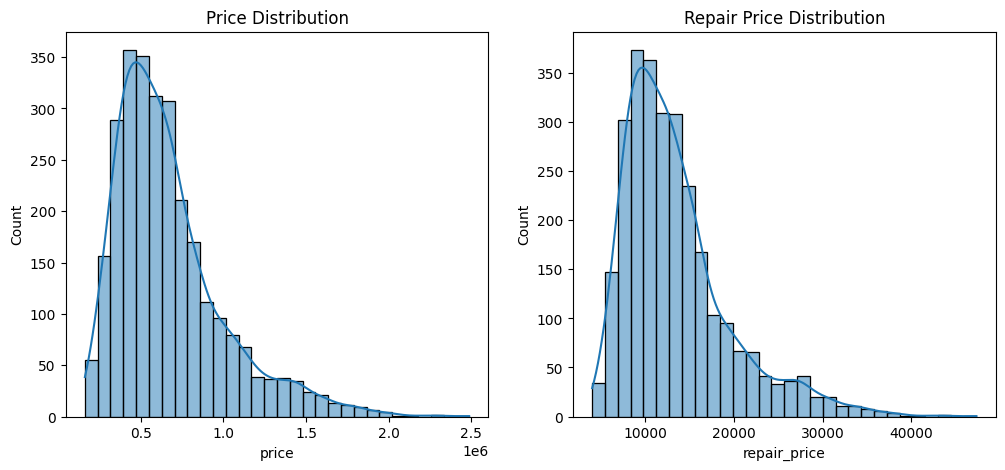

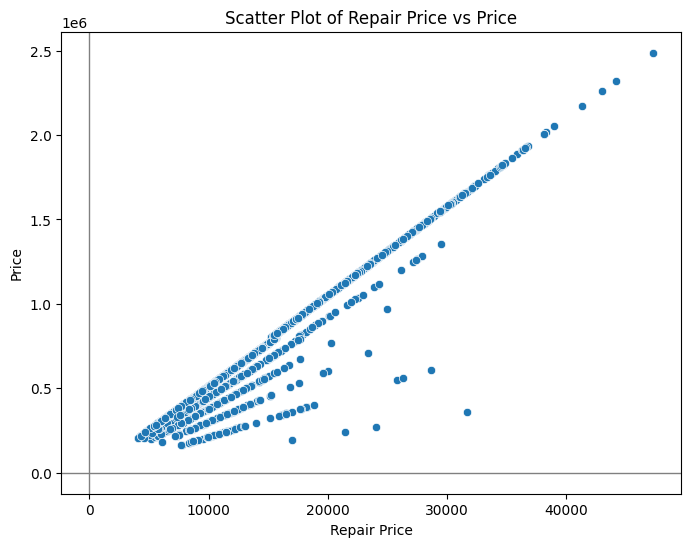

'# Calculate Spearman correlation to capture monotonic relationships\nspearman_corr = data_subset.corr(method=\'spearman\')\n\n# Print Spearman correlation matrix\nprint("Spearman Correlation Matrix for Selected Columns:")\nprint(spearman_corr)\n\n# Visualize the Spearman correlation matrix using a heatmap\nplt.figure(figsize=(8, 6))\nsns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap=\'coolwarm\', square=True, cbar=True)\nplt.title(\'Spearman Correlation Matrix Heatmap for Selected Columns\')\nplt.show()\n\n# Focus on the correlation with the target variable \'price\'\nspearman_price_correlation = spearman_corr[\'price\'].sort_values(ascending=False)\nprint("\nSpearman Correlation with Price:")\nprint(spearman_price_correlation)'

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')


plt.subplot(1, 2, 2)
sns.histplot(data['repair_price'], bins=30, kde=True)
plt.title('Repair Price Distribution')

plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='repair_price', y='price')
plt.title('Scatter Plot of Repair Price vs Price')
plt.xlabel('Repair Price')
plt.ylabel('Price')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

'''# Calculate Spearman correlation to capture monotonic relationships
spearman_corr = data_subset.corr(method='spearman')

# Print Spearman correlation matrix
print("Spearman Correlation Matrix for Selected Columns:")
print(spearman_corr)

# Visualize the Spearman correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Spearman Correlation Matrix Heatmap for Selected Columns')
plt.show()

# Focus on the correlation with the target variable 'price'
spearman_price_correlation = spearman_corr['price'].sort_values(ascending=False)
print("\nSpearman Correlation with Price:")
print(spearman_price_correlation)'''

# Log Transformation
I am doing log trasnformation to fix the right skewness of my data and understand if the relationship between price and repair_price is being affected by outliers.

In [31]:
data['log_price'] = np.log1p(data['price'])
data['log_repair_price'] = np.log1p(data['repair_price'])

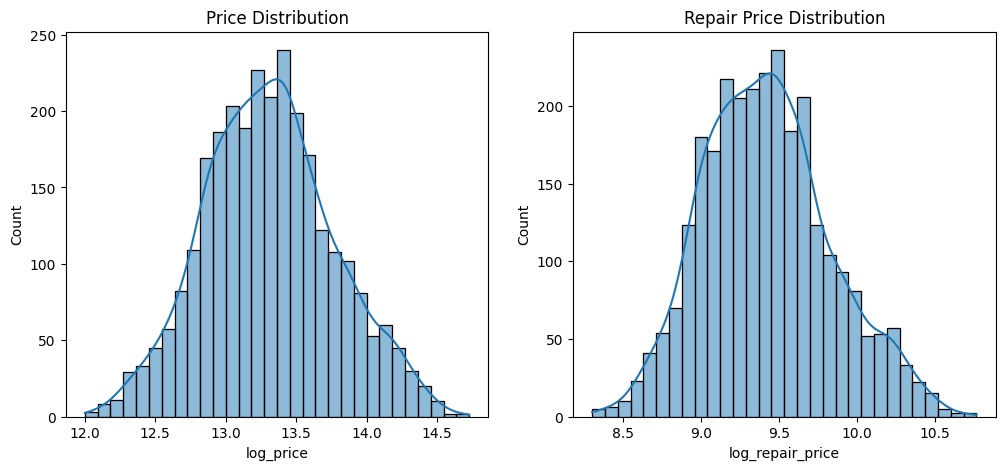

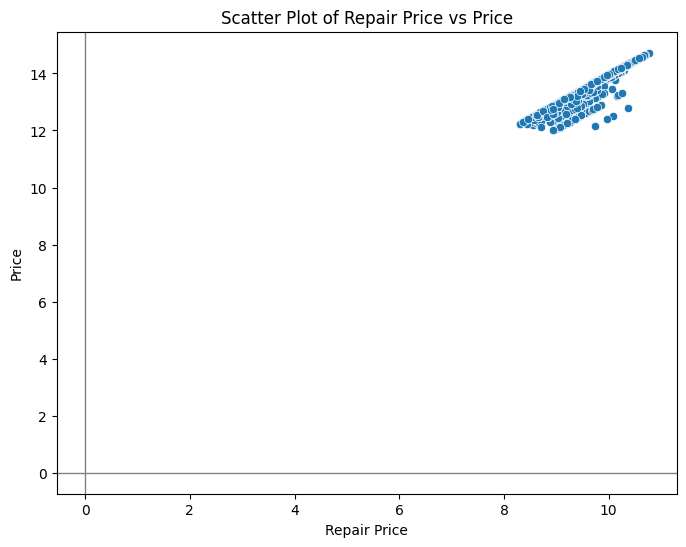

In [32]:

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.histplot(data['log_price'], bins=30, kde=True)
plt.title('Price Distribution')


plt.subplot(1, 2, 2)
sns.histplot(data['log_repair_price'], bins=30, kde=True)
plt.title('Repair Price Distribution')

plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='log_repair_price', y='log_price')
plt.title('Scatter Plot of Repair Price vs Price')
plt.xlabel('Repair Price')
plt.ylabel('Price')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

In [33]:
import numpy as np

# Assuming you have a DataFrame with the log-transformed column
data['price'] = np.expm1(data['log_price'])  # Using expm1 to undo log1p
data['repair_price'] = np.expm1(data['log_repair_price'])

# Inverse Log Transform
I am trying the inverse log transformation because it is typically used to change the relationship between variables.

In [34]:
data['inv_price'] = 1 / (data['price'] + 1e-9)  # Adding a small constant to avoid division by zero
data['inv_repair_price'] = 1 / (data['repair_price'] + 1e-9)  # Adding a small constant to avoid division by zero

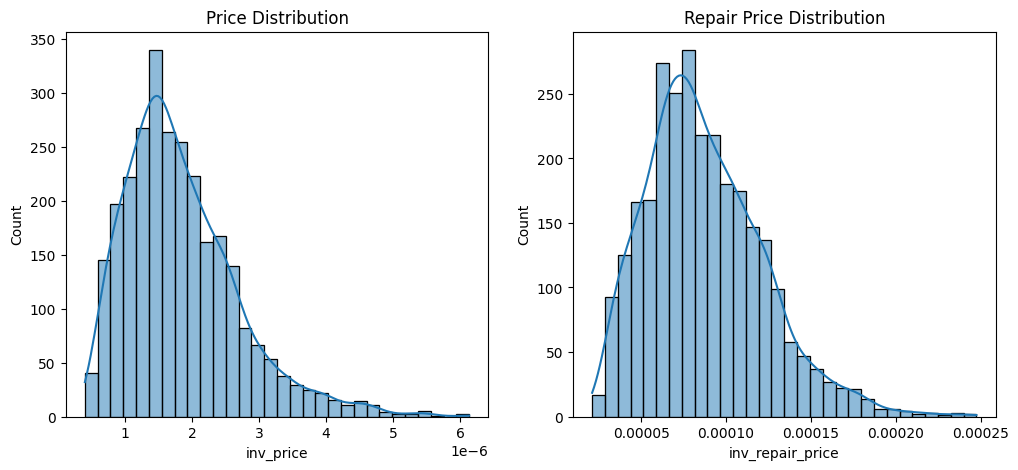

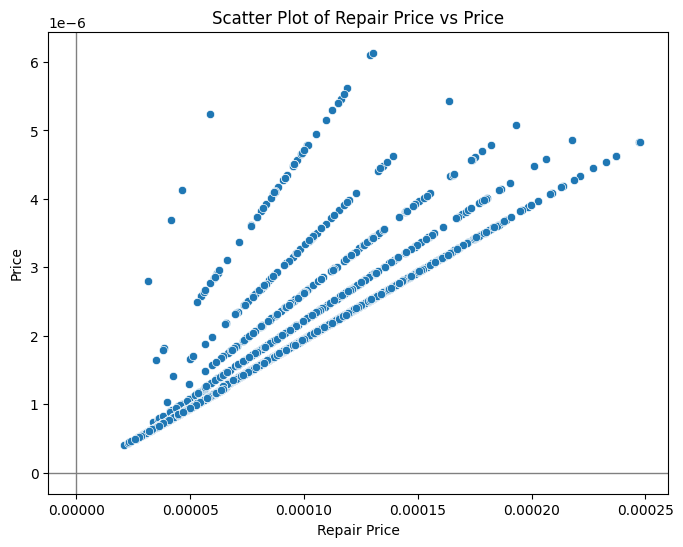

In [35]:
# Check the distribution of repair_price and price
plt.figure(figsize=(12, 5))

# Plotting price distribution
plt.subplot(1, 2, 1)
sns.histplot(data['inv_price'], bins=30, kde=True)
plt.title('Price Distribution')

# Plotting repair_price distribution
plt.subplot(1, 2, 2)
sns.histplot(data['inv_repair_price'], bins=30, kde=True)
plt.title('Repair Price Distribution')

plt.show()

# Step 1: Check the relationship visually
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='inv_repair_price', y='inv_price')
plt.title('Scatter Plot of Repair Price vs Price')
plt.xlabel('Repair Price')
plt.ylabel('Price')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

In [36]:
data['price'] = np.exp(data['inv_price'])  # Using expm1 to undo log1p
data['repair_price'] = np.exp(data['inv_repair_price'])

After analysing the columns of repair_price and price, it seems my interpretation of the overall_price column was wrong. It is not the repair price. Inherently the correlationship between these two columns is positive and linear, whereas logic suggest it should be negative and linear. Hence, best would be to drop this column altogether.

In [37]:
data.drop('repair_price', axis=1, inplace=True)

Let's try using a different correlation analysis method too along with pearson.

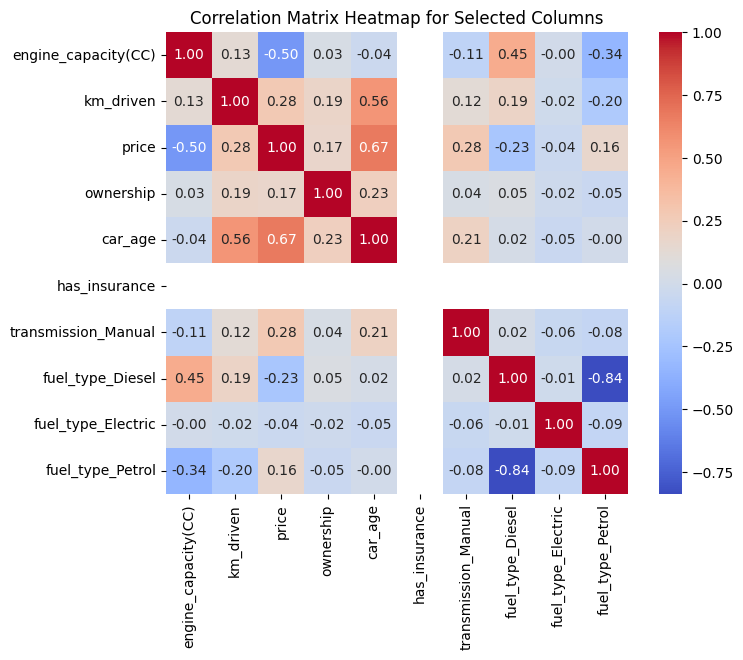


Correlation with Price:
price                  1.000000
car_age                0.673443
km_driven              0.279995
transmission_Manual    0.277821
ownership              0.167196
fuel_type_Petrol       0.163177
fuel_type_Electric    -0.042722
fuel_type_Diesel      -0.228534
engine_capacity(CC)   -0.503430
has_insurance               NaN
Name: price, dtype: float64


In [38]:
selected_columns = ['engine_capacity(CC)', 'km_driven', 'price', 'ownership', 'car_age', 'has_insurance', 'transmission_Manual', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol']
data_subset = data[selected_columns]

correlation_matrix = data_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap for Selected Columns')
plt.show()


price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("\nCorrelation with Price:")
print(price_correlation)

In this we can see that insurance is not affecting the price, but in actuality it should. Having insurance should drive up the price.

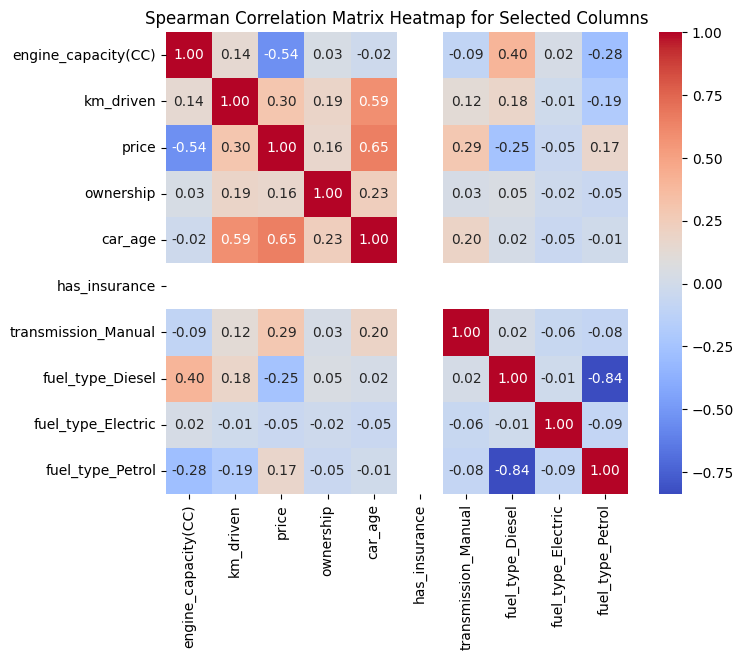


Spearman Correlation with Price:
price                  1.000000
car_age                0.648955
km_driven              0.299471
transmission_Manual    0.285668
fuel_type_Petrol       0.172785
ownership              0.161631
fuel_type_Electric    -0.052153
fuel_type_Diesel      -0.253379
engine_capacity(CC)   -0.537520
has_insurance               NaN
Name: price, dtype: float64


In [39]:
# Calculate Spearman correlation to capture monotonic relationships
spearman_corr = data_subset.corr(method='spearman')

# Visualize the Spearman correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Spearman Correlation Matrix Heatmap for Selected Columns')
plt.show()

# Focus on the correlation with the target variable 'price'
spearman_price_correlation = spearman_corr['price'].sort_values(ascending=False)
print("\nSpearman Correlation with Price:")
print(spearman_price_correlation)

Now It's possible that the presence of insurance might be a consequence of a higher-priced vehicle rather than the other way around. Like if you were to buy a lamborghini, you have to have an insurance because its a high priced vehicle and maybe insurance has no direct impact on the price. Hence we can let go of has_insurance.

But the engine_capacity still needs to be fixed. Higher the engine capacity, more should be the cost. There could be non-linear relations affecting this factor.

In [40]:
data.drop(['log_price', 'log_repair_price', 'inv_price', 'inv_repair_price'], axis=1, inplace=True)

In [41]:
data1 = pd.read_csv('modified_car_data.csv')

In [42]:
data1.head(50)

,brand,model,transmission,make_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,repair_price,has_insurance
0,Datsun,Redi Go T (O),Manual,2017,Petrol,799,47610,1st owner,239000,4682,True
1,Datsun,Redi Go A,Manual,2018,Petrol,799,45255,1st owner,225000,4404,True
2,Datsun,Redi Go S 1.0 AMT,Automatic,2019,Petrol,999,49836,1st owner,319000,6234,True
3,Datsun,Redi Go T(O) 1.0,Manual,2020,Petrol,999,39841,1st owner,342000,6695,True
4,Datsun,Redi Go T(O),Manual,2020,Petrol,799,42479,1st owner,389000,7614,True
5,Datsun,Go T,Manual,2015,Petrol,1198,12517,1st owner,207000,4047,True
6,Datsun,Go T,Manual,2016,Petrol,1198,104003,1st owner,241000,5361,True
7,Datsun,Redi Go S 1.0,Manual,2018,Petrol,999,42955,1st owner,276000,5398,True
8,Datsun,Redi Go T (O),Manual,2018,Petrol,799,108870,2nd owner,249000,5544,True
9,Datsun,Redi Go S 1.0,Manual,2018,Petrol,999,35098,1st owner,293000,5725,True


Starting fresh, I plan on not one hot encoding brand name and model. Instead focus on other features.

In [43]:
print(data1['transmission'].unique())
print(data1['fuel_type'].unique())

['Manual' 'Automatic']
['Petrol' 'CNG' 'Diesel' 'Electric']


Issue is one hot encoding ends up excluding sparse values like CNG and Automatic. While CNG makes sense, Automatic constitutes 31% of the transmission type values.

In [44]:
data1 = pd.get_dummies(data1, columns=['transmission', 'fuel_type'], drop_first=True, prefix=['transmission_', 'fuel_type_'])

In [45]:
data1.head(20)

,brand,model,make_year,engine_capacity(CC),km_driven,ownership,price,repair_price,has_insurance,transmission__Manual,fuel_type__Diesel,fuel_type__Electric,fuel_type__Petrol
0,Datsun,Redi Go T (O),2017,799,47610,1st owner,239000,4682,True,True,False,False,True
1,Datsun,Redi Go A,2018,799,45255,1st owner,225000,4404,True,True,False,False,True
2,Datsun,Redi Go S 1.0 AMT,2019,999,49836,1st owner,319000,6234,True,False,False,False,True
3,Datsun,Redi Go T(O) 1.0,2020,999,39841,1st owner,342000,6695,True,True,False,False,True
4,Datsun,Redi Go T(O),2020,799,42479,1st owner,389000,7614,True,True,False,False,True
5,Datsun,Go T,2015,1198,12517,1st owner,207000,4047,True,True,False,False,True
6,Datsun,Go T,2016,1198,104003,1st owner,241000,5361,True,True,False,False,True
7,Datsun,Redi Go S 1.0,2018,999,42955,1st owner,276000,5398,True,True,False,False,True
8,Datsun,Redi Go T (O),2018,799,108870,2nd owner,249000,5544,True,True,False,False,True
9,Datsun,Redi Go S 1.0,2018,999,35098,1st owner,293000,5725,True,True,False,False,True


Label encoding is also necessary.

I wanted to make the label encoding to 1 and 2 for 1st ownership and 2nd ownership. Default makes it 0 and 1. Hence I create a map and then use the map to alter the column.

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data1['ownership'] = le.fit_transform(data1['ownership'])

# Create a mapping dictionary to adjust the labels
mapping = {0: 1, 1: 2}


# Use the mapping to transform the 'ownership' column
data['ownership'] = data['ownership'].map(mapping)

In [81]:
data1.head(30)

,brand,model,make_year,engine_capacity(CC),km_driven,ownership,price,has_insurance,transmission__Manual,fuel_type__Diesel,fuel_type__Electric,fuel_type__Petrol
0,Datsun,Redi Go T (O),2017,799,47610,0,239000,True,True,False,False,True
1,Datsun,Redi Go A,2018,799,45255,0,225000,True,True,False,False,True
2,Datsun,Redi Go S 1.0 AMT,2019,999,49836,0,319000,True,False,False,False,True
3,Datsun,Redi Go T(O) 1.0,2020,999,39841,0,342000,True,True,False,False,True
4,Datsun,Redi Go T(O),2020,799,42479,0,389000,True,True,False,False,True
5,Datsun,Go T,2015,1198,12517,0,207000,True,True,False,False,True
6,Datsun,Go T,2016,1198,104003,0,241000,True,True,False,False,True
7,Datsun,Redi Go S 1.0,2018,999,42955,0,276000,True,True,False,False,True
8,Datsun,Redi Go T (O),2018,799,108870,1,249000,True,True,False,False,True
9,Datsun,Redi Go S 1.0,2018,999,35098,0,293000,True,True,False,False,True


We do feature creation again!

In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   brand                 2805 non-null   object
 1   model                 2805 non-null   object
 2   make_year             2805 non-null   int64 
 3   engine_capacity(CC)   2805 non-null   int64 
 4   km_driven             2805 non-null   int64 
 5   ownership             2805 non-null   object
 6   price                 2805 non-null   int64 
 7   repair_price          2805 non-null   int64 
 8   has_insurance         2805 non-null   bool  
 9   transmission__Manual  2805 non-null   bool  
 10  fuel_type__Diesel     2805 non-null   bool  
 11  fuel_type__Electric   2805 non-null   bool  
 12  fuel_type__Petrol     2805 non-null   bool  
dtypes: bool(5), int64(5), object(3)
memory usage: 189.1+ KB


# Outlier Detection
Amidst all of this, I forgot a very important step and that is outlier detection and handling. Previously I did check for skewness and performed log transformation for that and that effectively does handle the outlier problem. But still we need an in depth analysis and if outliers are less, we can just remove them instead of normalising the whole dataset.
# Scatter Plot
I'll first use a simple scatterplot for every column and then z-score, IQR and boxplots.

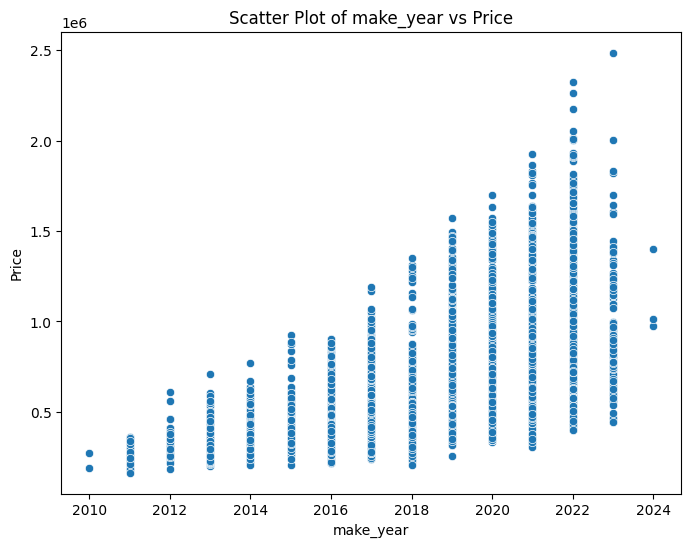

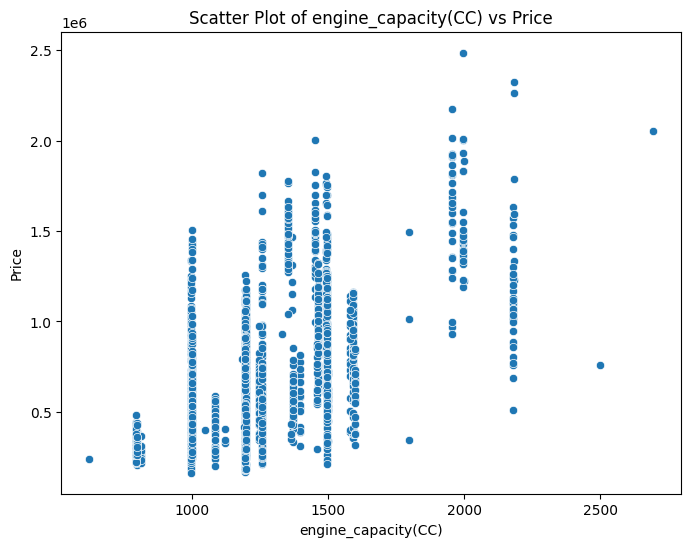

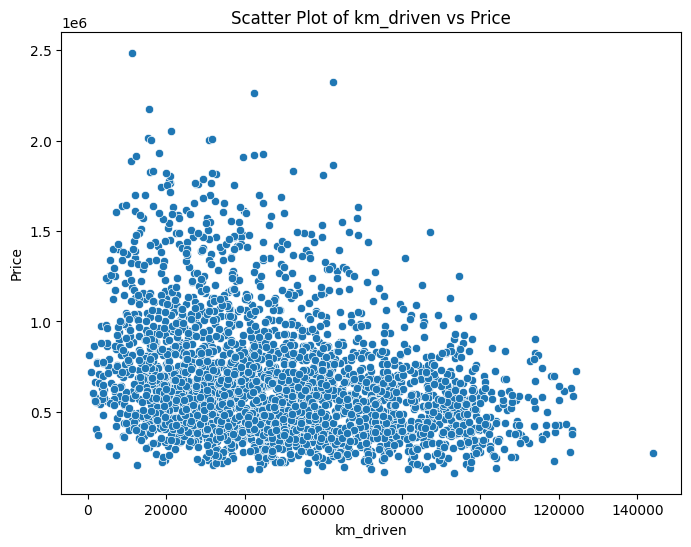

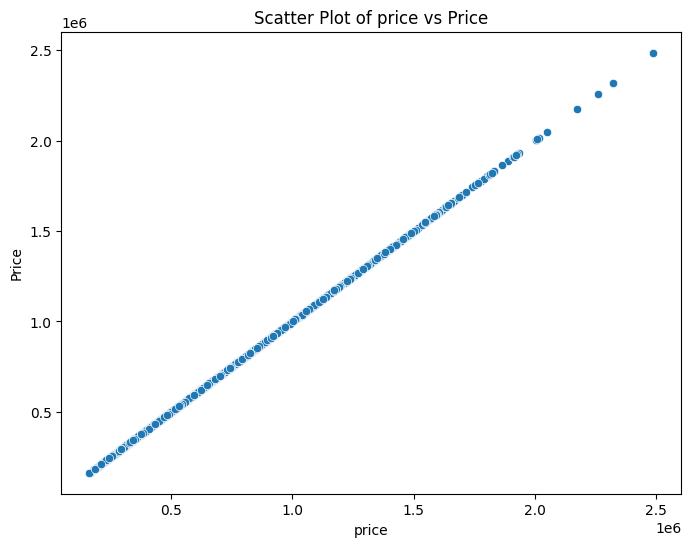

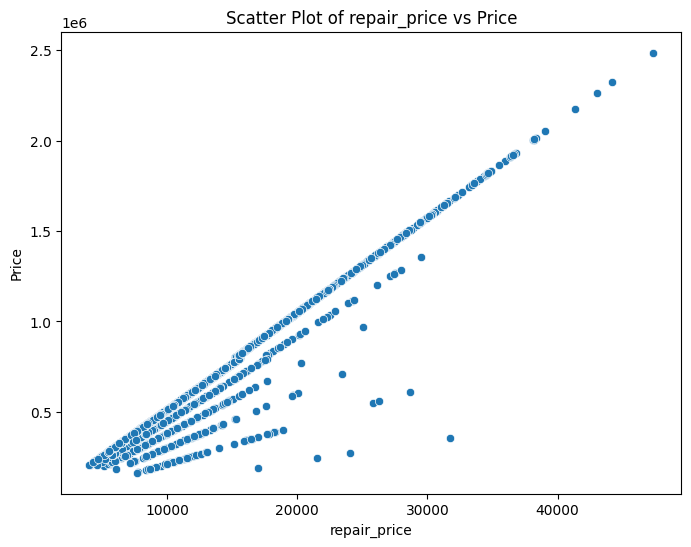

In [49]:
for col in data1.columns:
    if data1[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data1, x=col, y='price')
        plt.title(f'Scatter Plot of {col} vs Price')
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.show()

According to the scatterplot, there are definitely outliers but they are not too many.

# Z-score

In [50]:
# Calculate z-scores for all numeric columns
for col in data1.select_dtypes(include=['number']):
    data1[col + '_zscore'] = (data1[col] - data1[col].mean()) / data1[col].std()

In [51]:
data1

,brand,model,make_year,engine_capacity(CC),km_driven,ownership,price,repair_price,has_insurance,transmission__Manual,fuel_type__Diesel,fuel_type__Electric,fuel_type__Petrol,make_year_zscore,engine_capacity(CC)_zscore,km_driven_zscore,price_zscore,repair_price_zscore
0,Datsun,Redi Go T (O),2017,799,47610,1st owner,239000,4682,True,True,False,False,True,-0.401015,-1.846469,-0.060295,-1.305941,-1.458914
1,Datsun,Redi Go A,2018,799,45255,1st owner,225000,4404,True,True,False,False,True,-0.061490,-1.846469,-0.148740,-1.348215,-1.504935
2,Datsun,Redi Go S 1.0 AMT,2019,999,49836,1st owner,319000,6234,True,False,False,False,True,0.278035,-1.043702,0.023304,-1.064380,-1.201995
3,Datsun,Redi Go T(O) 1.0,2020,999,39841,1st owner,342000,6695,True,True,False,False,True,0.617560,-1.043702,-0.352067,-0.994931,-1.125681
4,Datsun,Redi Go T(O),2020,799,42479,1st owner,389000,7614,True,True,False,False,True,0.617560,-1.846469,-0.252995,-0.853014,-0.973549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,Volkswagen,TAIGUN TOPLINE 1.0 TSI AT,2022,999,35918,1st owner,1454000,27676,True,False,False,False,True,1.296610,-1.043702,-0.499400,2.362771,2.347529
2801,Volkswagen,Ameo HIGHLINE1.2L,2016,1198,12091,1st owner,484000,9461,True,True,False,False,True,-0.740539,-0.244950,-1.394245,-0.566160,-0.667795
2802,Volkswagen,Polo HIGHLINE1.2L,2014,1198,100662,2nd owner,342000,7608,True,True,False,False,True,-1.419589,-0.244950,1.932124,-0.994931,-0.974542
2803,Volkswagen,Polo HIGHLINE1.2L,2012,1198,61164,1st owner,294000,9765,True,True,False,False,True,-2.098639,-0.244950,0.448738,-1.139868,-0.617471


In [57]:
for col in data1.select_dtypes(include=['number']):
    zscore_col = col + '_zscore'
    if zscore_col in data1.columns:
        outliers = data1[(data1[zscore_col] > 4.5) | (data1[zscore_col] < -4.5)]
        print(f"Outliers in {zscore_col}:")
        print(outliers[[col, zscore_col]])

Outliers in make_year_zscore:
Empty DataFrame
Columns: [make_year, make_year_zscore]
Index: []
Outliers in engine_capacity(CC)_zscore:
      engine_capacity(CC)  engine_capacity(CC)_zscore
1201                 2498                    4.973032
2724                 2694                    5.759743
Outliers in km_driven_zscore:
Empty DataFrame
Columns: [km_driven, km_driven_zscore]
Index: []
Outliers in price_zscore:
        price  price_zscore
1285  2487000      5.481931
1311  2322000      4.983711
1312  2261000      4.799520
2616  2173000      4.533803


In [55]:
data1.drop('repair_price', axis=1, inplace=True)

In [56]:
data1.drop('repair_price_zscore', axis=1, inplace=True)

# BoxPlots and IQR

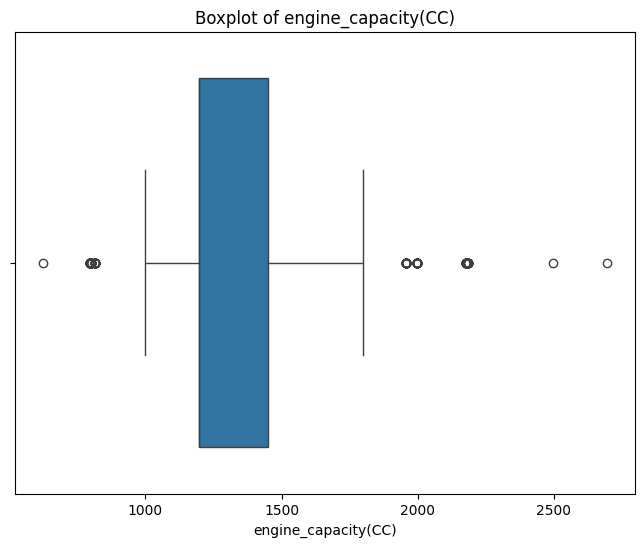

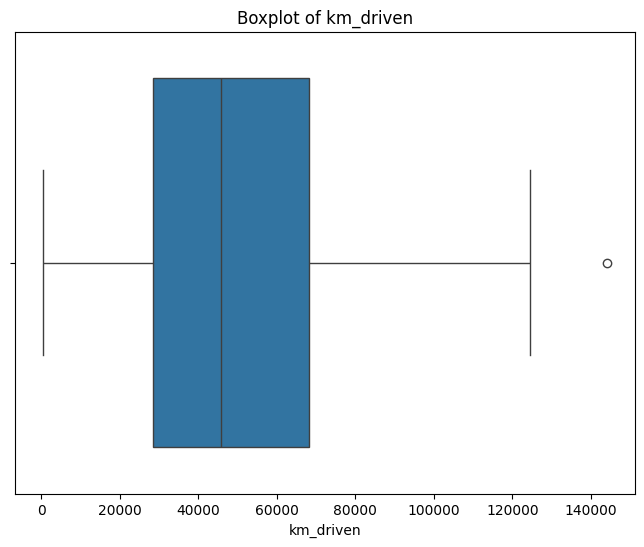

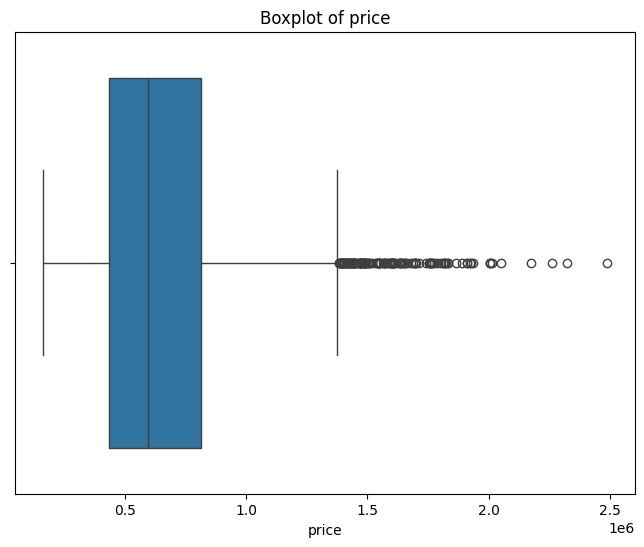

In [62]:
columns = ['engine_capacity(CC)', 'km_driven', 'price', 'transmission_Manual', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol']

for col in data1.columns:
  if col in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

I calculate the IQR and simply filter the values that fall out of the IQR that is below Q1 and above Q3.

In [64]:
numeric_cols = data1.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    #IQR = Q3 - Q1
    print(f"IQR for {col}: {Q1} - {Q3}")

IQR for make_year: 2016.0 - 2021.0
IQR for engine_capacity(CC): 1197.0 - 1451.0
IQR for km_driven: 28540.0 - 68182.0
IQR for price: 435000.0 - 814000.0
IQR for make_year_zscore: -0.7405393269989765 - 0.9570847431481871
IQR for engine_capacity(CC)_zscore: -0.2489634782490616 - 0.7705498640589034
IQR for km_driven_zscore: -0.7764873858179775 - 0.7123059518095264
IQR for price_zscore: -0.7141161175201721 - 0.430280519045895


In [68]:
for cols in data1.columns:
  if cols == col + '_zscore':
    data1.drop(cols, axis=1, inplace=True)

In [69]:
data1

,brand,model,make_year,engine_capacity(CC),km_driven,ownership,price,has_insurance,transmission__Manual,fuel_type__Diesel,fuel_type__Electric,fuel_type__Petrol,make_year_zscore,engine_capacity(CC)_zscore,km_driven_zscore,price_zscore
0,Datsun,Redi Go T (O),2017,799,47610,1st owner,239000,True,True,False,False,True,-0.401015,-1.846469,-0.060295,-1.305941
1,Datsun,Redi Go A,2018,799,45255,1st owner,225000,True,True,False,False,True,-0.061490,-1.846469,-0.148740,-1.348215
2,Datsun,Redi Go S 1.0 AMT,2019,999,49836,1st owner,319000,True,False,False,False,True,0.278035,-1.043702,0.023304,-1.064380
3,Datsun,Redi Go T(O) 1.0,2020,999,39841,1st owner,342000,True,True,False,False,True,0.617560,-1.043702,-0.352067,-0.994931
4,Datsun,Redi Go T(O),2020,799,42479,1st owner,389000,True,True,False,False,True,0.617560,-1.846469,-0.252995,-0.853014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,Volkswagen,TAIGUN TOPLINE 1.0 TSI AT,2022,999,35918,1st owner,1454000,True,False,False,False,True,1.296610,-1.043702,-0.499400,2.362771
2801,Volkswagen,Ameo HIGHLINE1.2L,2016,1198,12091,1st owner,484000,True,True,False,False,True,-0.740539,-0.244950,-1.394245,-0.566160
2802,Volkswagen,Polo HIGHLINE1.2L,2014,1198,100662,2nd owner,342000,True,True,False,False,True,-1.419589,-0.244950,1.932124,-0.994931
2803,Volkswagen,Polo HIGHLINE1.2L,2012,1198,61164,1st owner,294000,True,True,False,False,True,-2.098639,-0.244950,0.448738,-1.139868


In [71]:
data1.drop(['make_year_zscore', 'engine_capacity(CC)_zscore', 'km_driven_zscore', 'price_zscore'], axis=1, inplace=True)

In [83]:
data1

,brand,model,make_year,engine_capacity(CC),km_driven,ownership,price,has_insurance,transmission__Manual,fuel_type__Diesel,fuel_type__Electric,fuel_type__Petrol
0,Datsun,Redi Go T (O),2017,799,47610,0,239000,True,True,False,False,True
1,Datsun,Redi Go A,2018,799,45255,0,225000,True,True,False,False,True
2,Datsun,Redi Go S 1.0 AMT,2019,999,49836,0,319000,True,False,False,False,True
3,Datsun,Redi Go T(O) 1.0,2020,999,39841,0,342000,True,True,False,False,True
4,Datsun,Redi Go T(O),2020,799,42479,0,389000,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2800,Volkswagen,TAIGUN TOPLINE 1.0 TSI AT,2022,999,35918,0,1454000,True,False,False,False,True
2801,Volkswagen,Ameo HIGHLINE1.2L,2016,1198,12091,0,484000,True,True,False,False,True
2802,Volkswagen,Polo HIGHLINE1.2L,2014,1198,100662,1,342000,True,True,False,False,True
2803,Volkswagen,Polo HIGHLINE1.2L,2012,1198,61164,0,294000,True,True,False,False,True


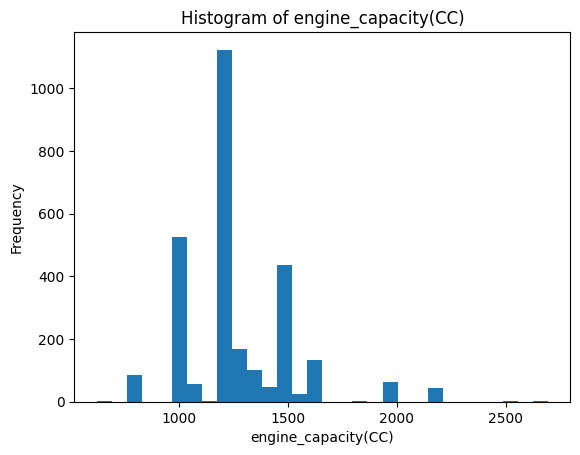

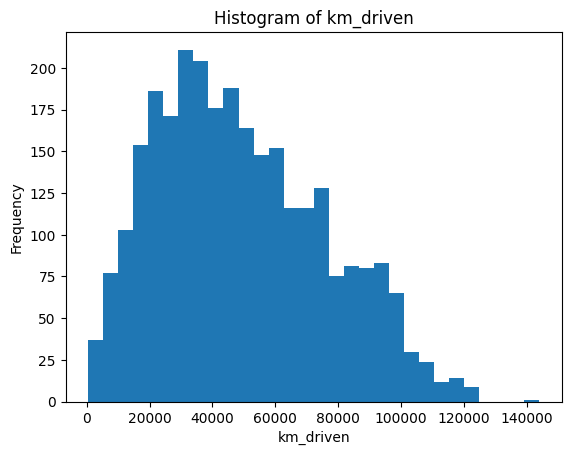

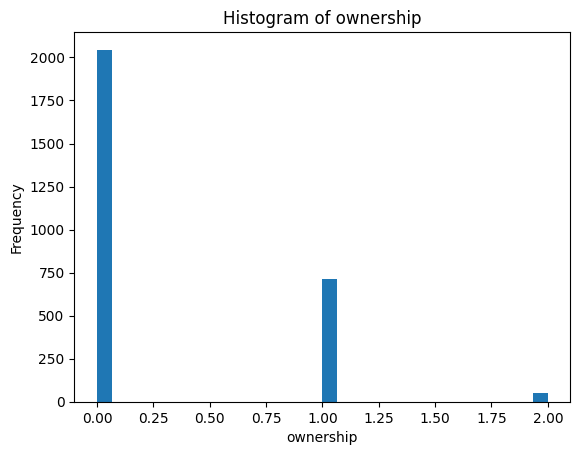

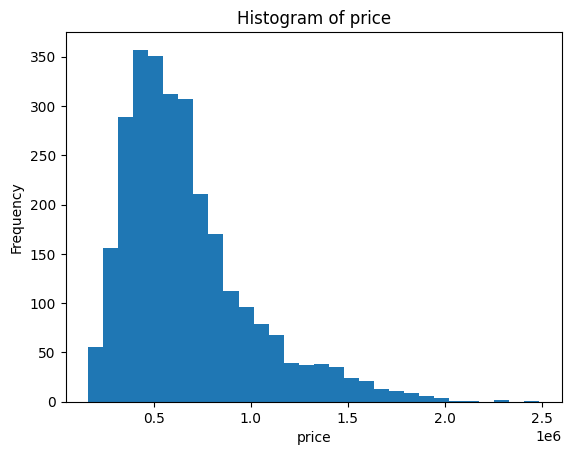

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

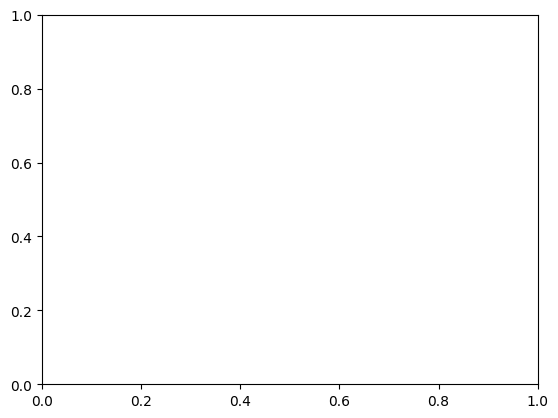

In [87]:
numeric_cols = [col for col in data1.columns if pd.api.types.is_numeric_dtype(data1[col]) and col not in ['make_year', 'has_insurance']]

# Loop through each numeric column and create a histogram
for col in numeric_cols:
    plt.figure()  # Create a new figure for each histogram
    plt.hist(data1[col], bins=30)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

All columns are right skewed, contain few outliers. Hence, log transform is the best way to deal with this. Once done, the dataset is ready for visualisation!

In [90]:
for col in ['price', 'engine_capacity(CC)', 'km_driven']:
    data1[f'log_{col}'] = np.log1p(data1[col])

In [91]:
data1

,brand,model,make_year,engine_capacity(CC),km_driven,ownership,price,has_insurance,transmission__Manual,fuel_type__Diesel,fuel_type__Electric,fuel_type__Petrol,log_price,log_engine_capacity(CC),log_km_driven
0,Datsun,Redi Go T (O),2017,799,47610,0,239000,True,True,False,False,True,12.384223,6.684612,10.770819
1,Datsun,Redi Go A,2018,799,45255,0,225000,True,True,False,False,True,12.323860,6.684612,10.720091
2,Datsun,Redi Go S 1.0 AMT,2019,999,49836,0,319000,True,False,False,False,True,12.672950,6.907755,10.816513
3,Datsun,Redi Go T(O) 1.0,2020,999,39841,0,342000,True,True,False,False,True,12.742569,6.907755,10.592677
4,Datsun,Redi Go T(O),2020,799,42479,0,389000,True,True,False,False,True,12.871337,6.684612,10.656789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,Volkswagen,TAIGUN TOPLINE 1.0 TSI AT,2022,999,35918,0,1454000,True,False,False,False,True,14.189830,6.907755,10.489022
2801,Volkswagen,Ameo HIGHLINE1.2L,2016,1198,12091,0,484000,True,True,False,False,True,13.089842,7.089243,9.400299
2802,Volkswagen,Polo HIGHLINE1.2L,2014,1198,100662,1,342000,True,True,False,False,True,12.742569,7.089243,11.519534
2803,Volkswagen,Polo HIGHLINE1.2L,2012,1198,61164,0,294000,True,True,False,False,True,12.591338,7.089243,11.021330
